### Stock Market Prediction using Graph Neural Networks

In [1]:
from dataset.data import *
from models.gnn import *
from datetime import datetime

### Data Collection

In [ ]:
stock_path = '/Users/vivek/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/stocks'
meta_path  = '/Users/vivek/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/symbols_valid_meta.csv'
nasdaq100_path = '/Users/vivek/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/nasdaq_100.csv'

stock_data = NASDAQDataset(stock_path, meta_path, nasdaq100_path, "2014-01-01") # Collect all data after 2014-01-01
stock_data.read_data()

# Generate graphs for each day from the 30th data point (we need a minimum of 30 days to compute correlations)

for date in stock_data.data['AAPL'].index[30:]:
    G = stock_data.daily_graph_generator(date)

In [2]:
# Read the gml files and create PyG data objects

data_path = '/Users/vivek/Documents/PhD/UIUC/Fall24/CS598/Project/GNN-Stock-Market-Prediction/dataset/graphs'
data_list = [os.path.join(data_path, file) for file in os.listdir(data_path)]

train_loader = gnn_data_obj(data_list[0:1000]) # train on first 1000 graphs
test_loader = gnn_data_obj(data_list[1000:]) # test on remaining graphs


100%|██████████| 541/541 [00:33<00:00, 16.07it/s]


### Training

In [5]:
# Initialize the StockGNN model and optimizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

stock_gcn_model = StockGCN().to(device)
gcn_optimizer = torch.optim.Adam(stock_gcn_model.parameters(), lr=0.005, weight_decay=1e-5)

stock_gat_model = StockGAT().to(device)
gat_optimizer = torch.optim.Adam(stock_gat_model.parameters(), lr=0.001, weight_decay=1e-5)

In [6]:
# TRAIN!

train_loss, test_mape = train(stock_gcn_model, gcn_optimizer, train_loader, train_loader, 100)

train_loss_gat, test_mape_gat = train(stock_gat_model, gat_optimizer, train_loader, test_loader, 100)

  1%|          | 1/100 [00:03<05:54,  3.58s/it]

Epoch 000, Train Loss: 136.2882, Val MAPE: 0.6874


 11%|█         | 11/100 [00:35<04:40,  3.16s/it]

Epoch 010, Train Loss: 108.9524, Val MAPE: 1.0645


 21%|██        | 21/100 [01:07<04:20,  3.29s/it]

Epoch 020, Train Loss: 107.6689, Val MAPE: 1.0607


 31%|███       | 31/100 [01:41<03:54,  3.39s/it]

Epoch 030, Train Loss: 107.0966, Val MAPE: 1.0713


 41%|████      | 41/100 [02:14<03:15,  3.32s/it]

Epoch 040, Train Loss: 106.5491, Val MAPE: 1.0348


 51%|█████     | 51/100 [02:46<02:35,  3.17s/it]

Epoch 050, Train Loss: 105.9525, Val MAPE: 1.0094


 61%|██████    | 61/100 [03:20<02:05,  3.22s/it]

Epoch 060, Train Loss: 105.5622, Val MAPE: 0.9934


 71%|███████   | 71/100 [03:52<01:35,  3.30s/it]

Epoch 070, Train Loss: 105.2126, Val MAPE: 0.9875


 81%|████████  | 81/100 [04:26<01:01,  3.22s/it]

Epoch 080, Train Loss: 104.9092, Val MAPE: 0.9736


 91%|█████████ | 91/100 [04:59<00:30,  3.41s/it]

Epoch 090, Train Loss: 104.6641, Val MAPE: 0.9850


  1%|          | 1/100 [00:08<14:35,  8.84s/it]

Epoch 000, Train Loss: 122.5818, Val MAPE: 1.1655


 11%|█         | 11/100 [01:28<11:21,  7.66s/it]

Epoch 010, Train Loss: 101.3854, Val MAPE: 1.0197


 21%|██        | 21/100 [02:48<10:24,  7.91s/it]

Epoch 020, Train Loss: 93.8277, Val MAPE: 0.8549


 31%|███       | 31/100 [04:09<09:25,  8.19s/it]

Epoch 030, Train Loss: 88.5811, Val MAPE: 0.8391


 41%|████      | 41/100 [05:30<08:05,  8.23s/it]

Epoch 040, Train Loss: 85.6582, Val MAPE: 0.6868


 51%|█████     | 51/100 [06:54<07:04,  8.67s/it]

Epoch 050, Train Loss: 85.6538, Val MAPE: 0.6466


 61%|██████    | 61/100 [08:17<05:38,  8.68s/it]

Epoch 060, Train Loss: 84.1050, Val MAPE: 0.7375


 71%|███████   | 71/100 [09:43<04:09,  8.62s/it]

Epoch 070, Train Loss: 82.3854, Val MAPE: 0.6085


 81%|████████  | 81/100 [11:10<02:44,  8.65s/it]

Epoch 080, Train Loss: 80.7431, Val MAPE: 0.5570


 91%|█████████ | 91/100 [12:36<01:17,  8.59s/it]

Epoch 090, Train Loss: 78.8639, Val MAPE: 0.5996


100%|██████████| 100/100 [13:55<00:00,  8.36s/it]


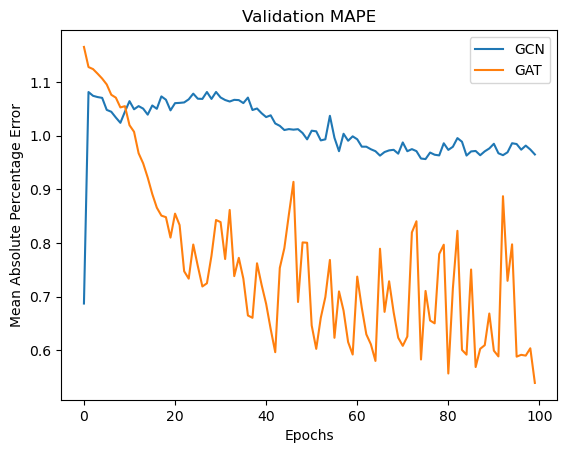

In [7]:
# Plot the validation MAPE

plt.title('Validation MAPE')
plt.plot(test_mape, label = 'GCN')
plt.plot(test_mape_gat, label = 'GAT')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Percentage Error')
plt.show()